In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import scikitplot as skplt

import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import scikitplot as skplt

import tensorflow as tf

In [5]:
data = pd.read_csv('C:\\Users\madhu\Downloads\ML Project\heart3.csv')
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [6]:
print(f'Number of rows:', data.shape[0])
print(f'Number of columns:', data.shape[1])

Number of rows: 303
Number of columns: 14


In [7]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data = pd.read_csv('C:\\Users\madhu\Downloads\ML Project\heart3.csv')
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [13]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_columns = ['age', 'trtbps', 'oldpeak', 'chol', 'thalachh']
data[cat_columns] = data[cat_columns].astype(str)

In [14]:
data.describe()

age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

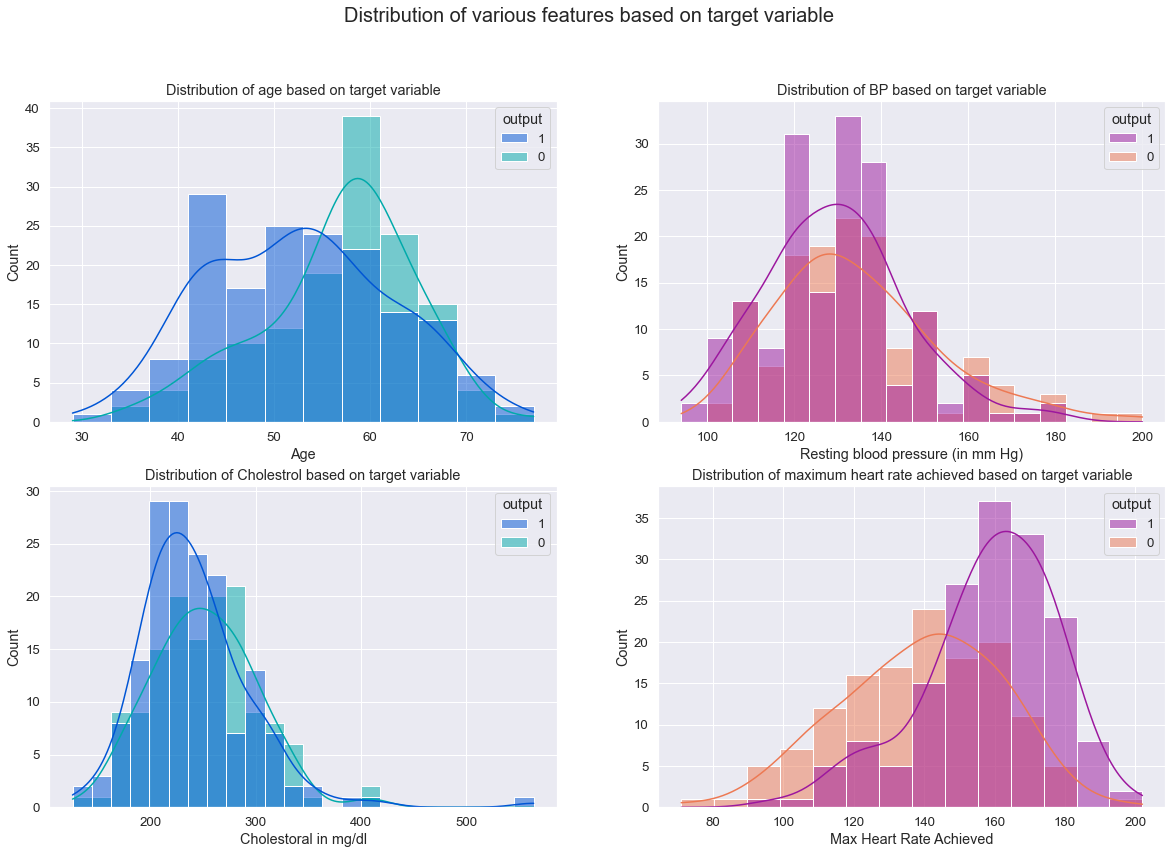

In [16]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= data, hue= 'output', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trtbps', data= data, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= data, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalachh', data= data, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

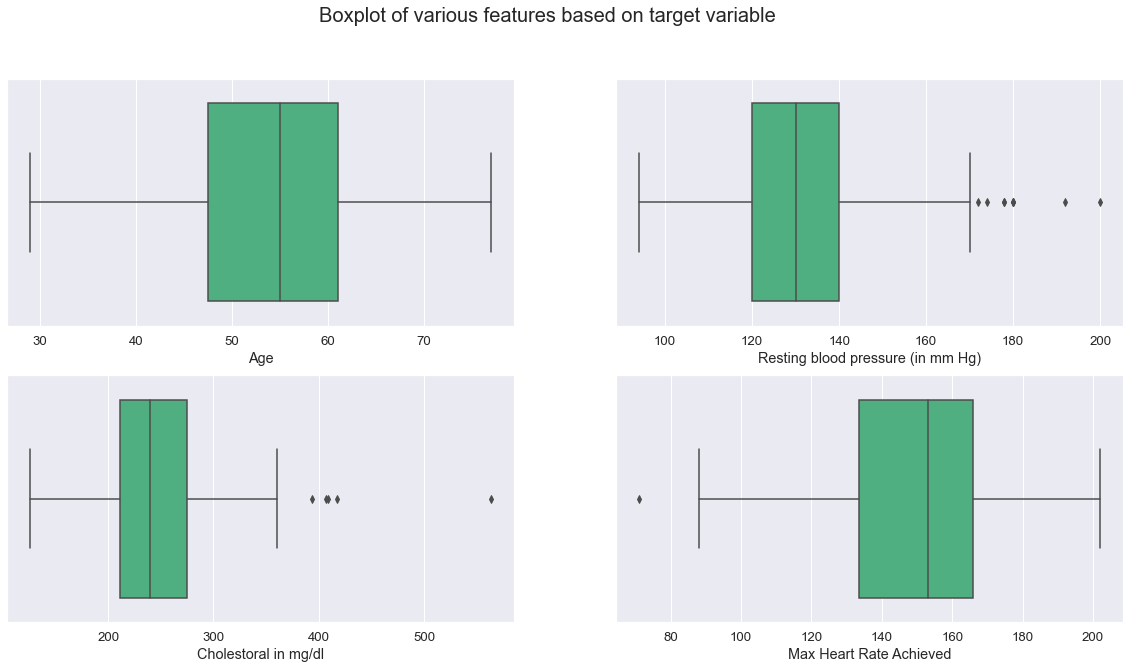

In [17]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

plt.suptitle('Boxplot of various features based on target variable', fontsize = 20)

ax1 = sns.boxplot(x ='age', data= data, ax= ax[0, 0], color = '#40bf80')
ax1.set(xlabel = 'Age')

ax2 = sns.boxplot(x ='trtbps', data= data, ax= ax[0, 1], color='#40bf80')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)')

ax3 = sns.boxplot(x ='chol', data= data, hue= 'output', ax= ax[1, 0], color= '#40bf80')
ax3.set(xlabel = 'Cholestoral in mg/dl')

ax4 = sns.boxplot(x ='thalachh', data= data, ax= ax[1, 1], color = '#40bf80')
ax4.set(xlabel = 'Max Heart Rate Achieved')

plt.show()

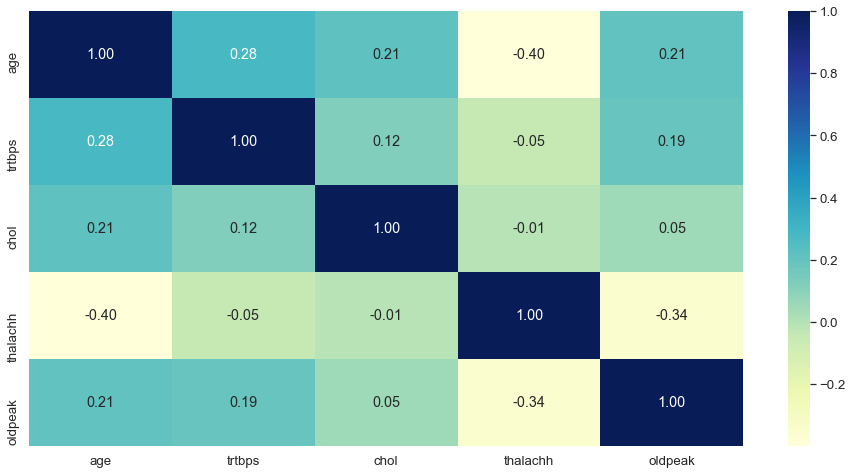

In [18]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

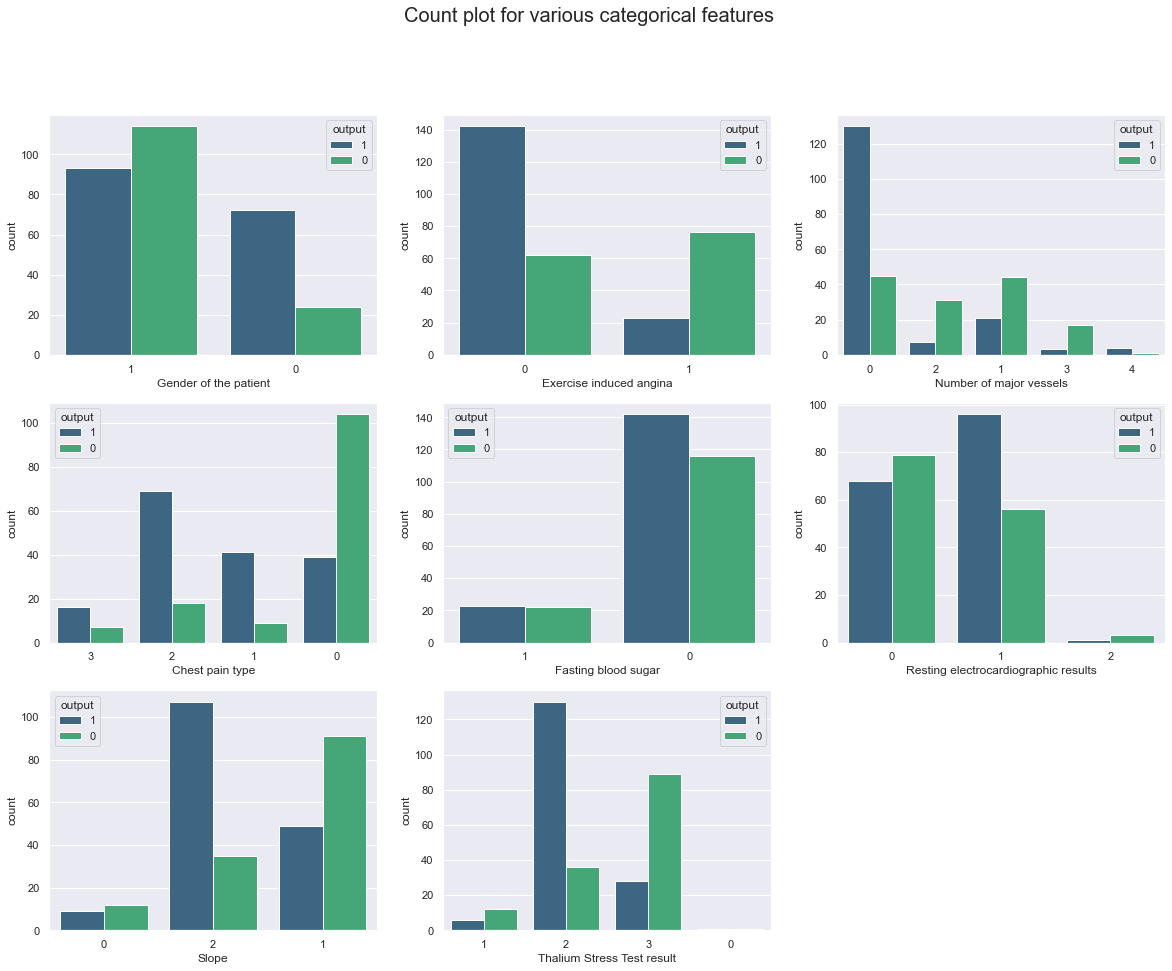

In [19]:
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(3, 3, figsize = (20, 15))
ax[2, 2].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= data, ax= ax[0, 0], hue = 'output' ,palette= 'viridis')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= data, hue= 'output', ax= ax[0, 1], palette= 'viridis')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= data, ax= ax[0, 2], hue = 'output', palette= 'viridis')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= data, hue = 'output', ax= ax[1, 0], palette= 'viridis')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= data, hue = 'output', ax= ax[1, 1], palette= 'viridis')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= data, ax= ax[1, 2], hue = 'output', palette= 'viridis')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= data, ax= ax[2, 0], hue = 'output', palette= 'viridis')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= data, ax= ax[2, 1], hue = 'output', palette= 'viridis')
ax8.set(xlabel = 'Thalium Stress Test result')

plt.show()

In [20]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

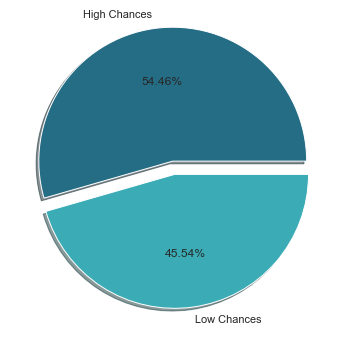

In [21]:
plt.figure(figsize= (6, 8))
data_pie  = [165 , 138]
labels = ["High Chances", "Low Chances"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.show()

In [22]:
def skewness(data):
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data[feature]))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    return skew_df

In [23]:
skewness(data=data[num_columns])

Feature      Skew  Absolute Skew
0       age -0.201460       0.201460
1    trtbps  0.710230       0.710230
2   oldpeak  1.263426       1.263426
3      chol  1.137733       1.137733
4  thalachh -0.534746       0.534746

In [24]:
data['oldpeak'] = np.log1p(data['oldpeak'])
data['chol'] = np.log1p(data['chol'])

In [25]:
data = pd.get_dummies(data, drop_first=True)

In [26]:
data.head()

age  trtbps      chol  thalachh   oldpeak  sex_1  cp_1  cp_2  cp_3  fbs_1  \
0   63     145  5.455321       150  1.193922      1     0     0     1      1   
1   37     130  5.525453       187  1.504077      1     0     1     0      0   
2   41     130  5.323010       172  0.875469      0     1     0     0      0   
3   56     120  5.468060       178  0.587787      1     1     0     0      0   
4   57     120  5.872118       163  0.470004      0     0     0     0      0   

   ...  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  thall_1  thall_2  thall_3  \
0  ...      0      0      0      0      0      0        1        0        0   
1  ...      0      0      0      0      0      0        0        1        0   
2  ...      0      1      0      0      0      0        0        1        0   
3  ...      0      1      0      0      0      0        0        1        0   
4  ...      0      1      0      0      0      0        0        1        0   

   output_1  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 23 columns]

In [27]:
X = data.drop('output_1', axis= 1)
y = data.output_1

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20,random_state= 42)

In [30]:
print(X_train.shape)

(242, 22)


In [31]:
models = {
    'logistic regression' : LogisticRegression(),
    'knn' : KNeighborsClassifier(),
    'svm' : SVC(probability=True),
    'gradient boosing' : GradientBoostingClassifier(),
    'random forest' : RandomForestClassifier(),
}

In [36]:
def train_test_model(model, X_train, y_train, X_test, y_test, seed=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results = {}
    kf = KFold(n_splits= 5)
    results['roc_auc'] = round(np.mean(cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)), 3)
    results['accuracy'] = round(np.mean(cross_val_score(model, X_train, y_train, scoring= 'accuracy', cv= kf)), 3)
    results['precision'] = round(np.mean(cross_val_score(model, X_train, y_train, scoring= 'precision', cv= kf)), 3)
    results['recall'] = round(np.mean(cross_val_score(model, X_train, y_train, scoring= 'recall', cv= kf)), 3)
    
    return results

    
def plot_performance(model_name: str, y_test, results=None, seed=None):
    model = models[model_name]
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(12,5))
    # fig.subplots_adjust(top=0.1)
    plt.suptitle(model_name.title(), fontsize=15)
    
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, linewidth=2, color= 'teal')
    plt.plot([0,1], [0,1], 'r--' )
    plt.title(f'ROC Curve - {results["roc_auc"]}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.subplot(1,2,2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    plt.show()
    
    # pd.DataFrame(results, index=[0]).T.plot(kind='bar', legend=False, color= 'teal')
    
results = {}

In [38]:
model_name = 'logistic regression'
results[model_name] = train_test_model(models[model_name], X_train, y_train, X_test, y_test)

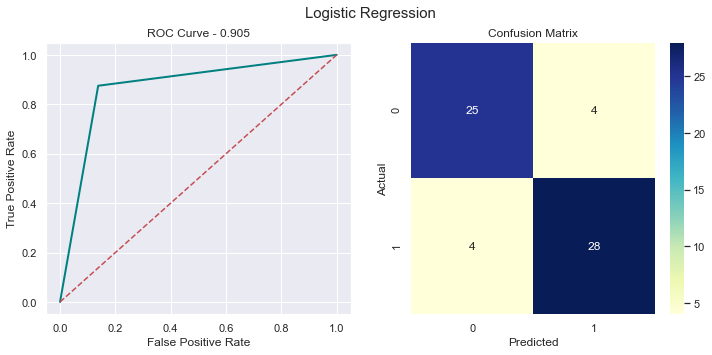

In [39]:
plot_performance(model_name, y_test, results[model_name])